In [75]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [76]:
%matplotlib inline

In [77]:
df = pd.concat(pd.read_excel('Excel_updatedCountySheet.xlsx', sheet_name=None), ignore_index=True)

In [78]:
# first five column of dataset
df.head()

,Unnamed: 0,TEACHER_SALARY,YEARS_TAUGHT,LASTNAME,FULL_TIME,CLASSES_TAUGHT,JOBCODE1,HIGHESTCOMPLETED,COUNTY_CODE
0,6,55996.0,NaN,Gibbons,1,1.0,1001,NaN,1
1,12,86539.0,19.0,Adair,1,5.0,1001,Masters,1
2,13,64357.0,9.0,Roberts,1,5.0,1001,Bachelors,1
3,14,90308.0,19.0,Horner,1,5.0,1001,Doctoral,1
4,15,67401.0,12.0,Broomhead,1,5.0,1106,Bachelors,1


In [79]:
# Describe the dataset
df.describe()

,Unnamed: 0,TEACHER_SALARY,YEARS_TAUGHT,FULL_TIME,CLASSES_TAUGHT,JOBCODE1,COUNTY_CODE
count,41300.000000,41296.000000,41177.000000,41300.0,41264.000000,41300.000000,41300.000000
mean,69277.902010,73404.052838,12.729606,1.0,4.127545,1380.288668,19.301404
std,40840.174574,16993.950639,8.443246,0.0,2.571922,503.627308,11.673301
min,6.000000,18500.000000,0.000000,1.0,1.000000,1001.000000,1.000000
25%,34195.750000,59012.250000,6.000000,1.0,1.000000,1001.000000,7.000000
50%,68123.000000,70700.000000,12.000000,1.0,5.000000,1103.000000,21.000000
75%,104452.250000,85928.500000,18.000000,1.0,5.000000,1901.000000,29.000000
max,140908.000000,145798.000000,50.000000,1.0,40.000000,2391.000000,41.000000


# Cleaning the dataframe

In [80]:
df.drop(df.columns[0], axis=1, inplace=True)
df['TEACHER_SALARY'].replace('', 0, inplace=True)
# df.dropna(subset=['TEACHER_SALARY'], inplace=True)

In [81]:
# Checking if there is any row with empty values in TEACHER_SALARY column
df['TEACHER_SALARY'].isnull().sum()

4

# Translate County Codes to County Names

In [82]:
# The dataset only stores COUNTY_CODE, this dictionary will be useful to plot categorical Data
countyNameCode = {
    1: 'Atlantic',
    3: 'Bergen',
    5: 'Burlington',
    7: 'Camden',
    9: 'Cape May',
    11: 'Cumberland',
    13: 'Essex',
    15: 'Gloucester',
    17: 'Hudson',
    19: 'Hunterdon',
    21: 'Mercer',
    23: 'Middlesex',
    25: 'Monmouth',
    27: 'Morris', 
    29: 'Ocean', 
    31: 'Passaic', 
    33: 'Salem', 
    35: 'Somerset', 
    37: 'Sussex',
    39: 'Union',
    41: 'Warren'
}

In [83]:
def codeToName(code):
    return countyNameCode.get(code)

In [84]:
df['COUNTY'] = df.apply(lambda x: codeToName(x['COUNTY_CODE']), axis=1)

# Data Visualization

In [85]:
# Configurations for visualizations

In [86]:
sns.set(style='whitegrid', rc={"figure.figsize": [20, 8]})

### Teacher Count by County

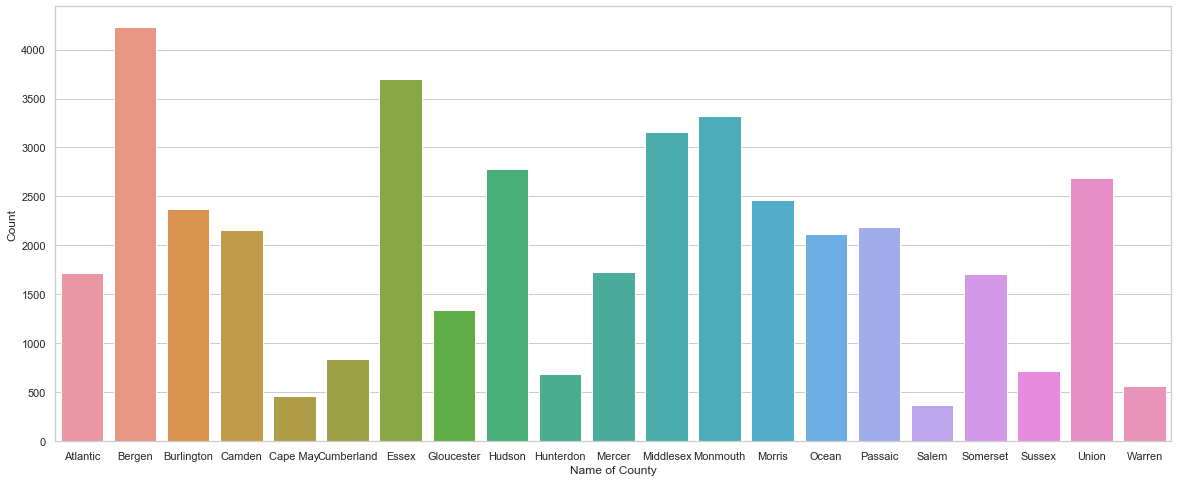

In [87]:
sns.countplot(df['COUNTY']).set(xlabel='Name of County', ylabel='Count');

### Box plot of Teacher Salary vs County

This chart will allow us to comapre averages, max and minimum salaries of all counties.

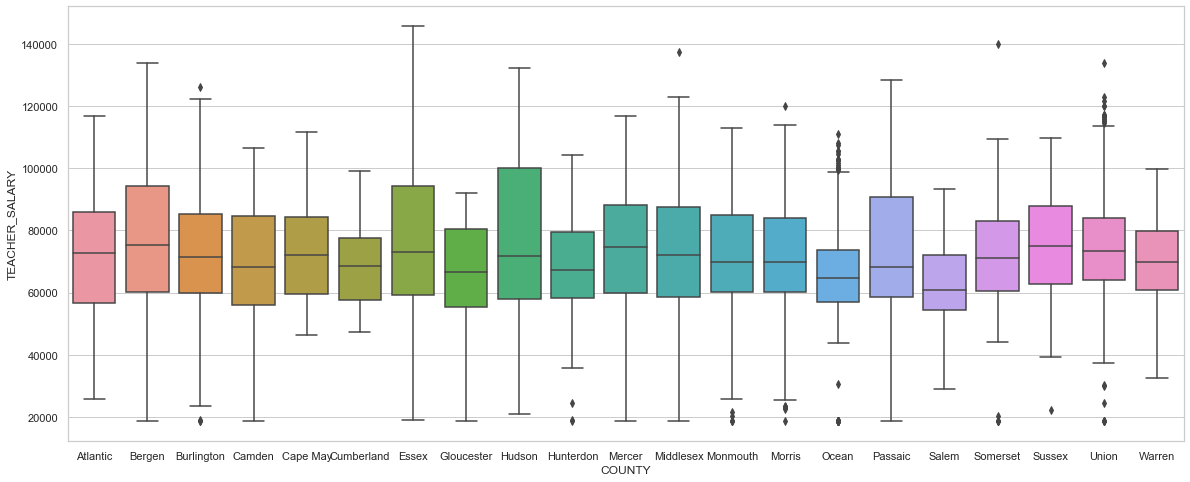

In [88]:
sns.boxplot(x="COUNTY", y="TEACHER_SALARY",data=df)

## Plotting heatmap to see if any columns are correlated

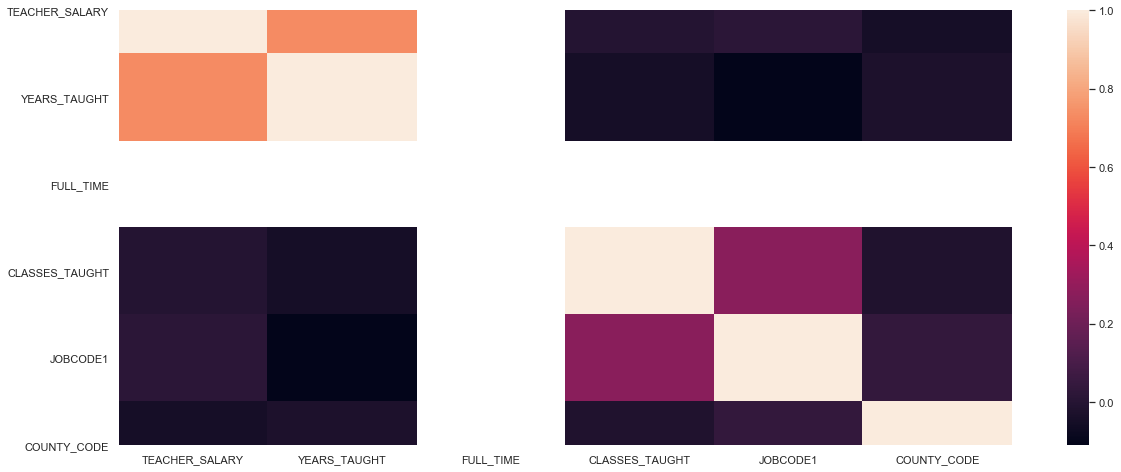

In [89]:
sns.heatmap(df.corr())

#### It seems YEARS_TAUGHT and TEACHER_SALARY are correlated.


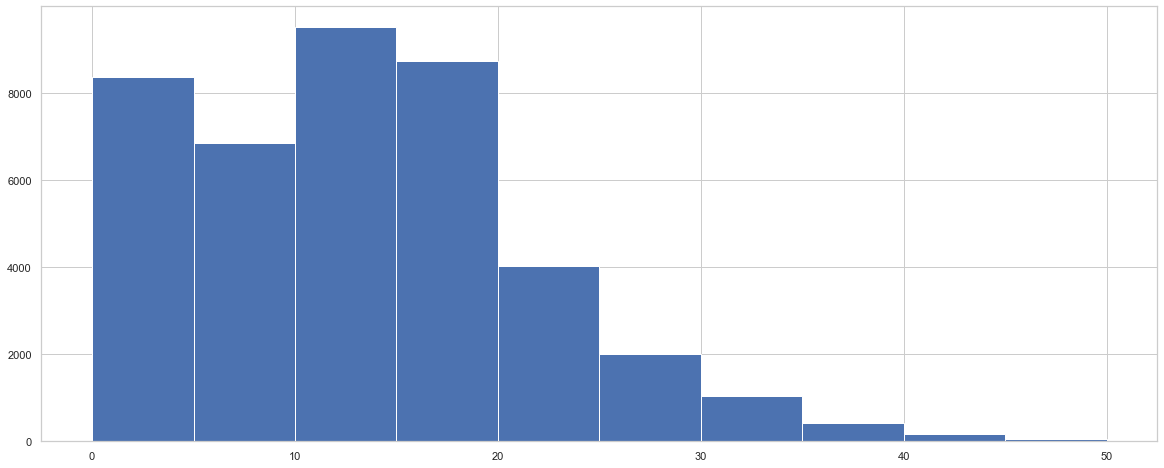

In [90]:
df['YEARS_TAUGHT'].hist()

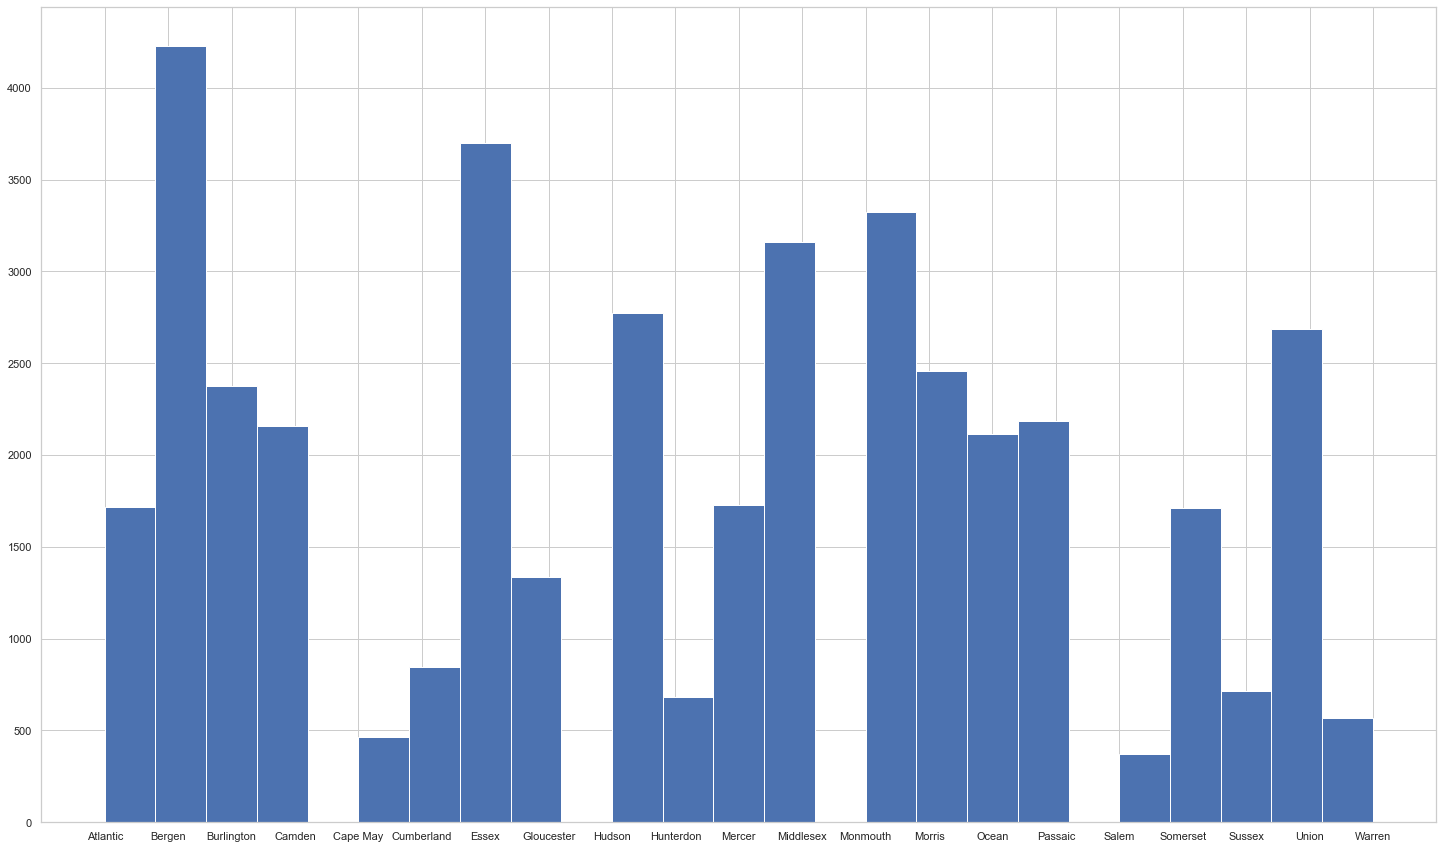

In [91]:
df['COUNTY'].hist(figsize=(25,15), bins=25)

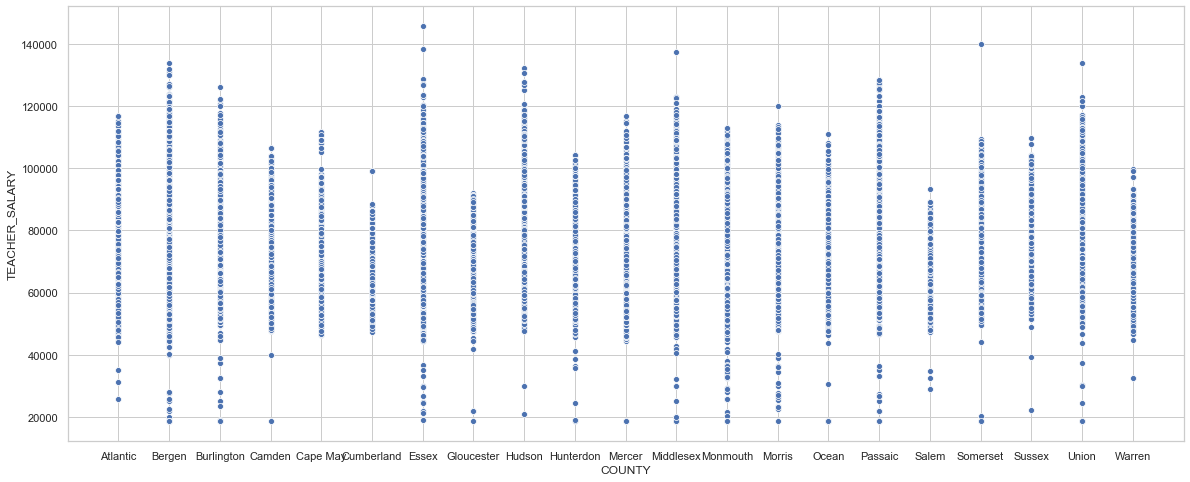

In [92]:
sns.scatterplot(x='COUNTY', y='TEACHER_SALARY', data=df)

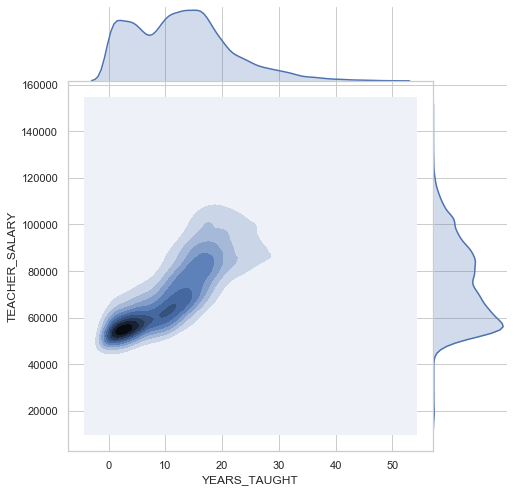

In [93]:
# Shows how years_taught is related to techer_salary
g = sns.jointplot(df['YEARS_TAUGHT'], df['TEACHER_SALARY'], kind="kde", height=7, space=0)

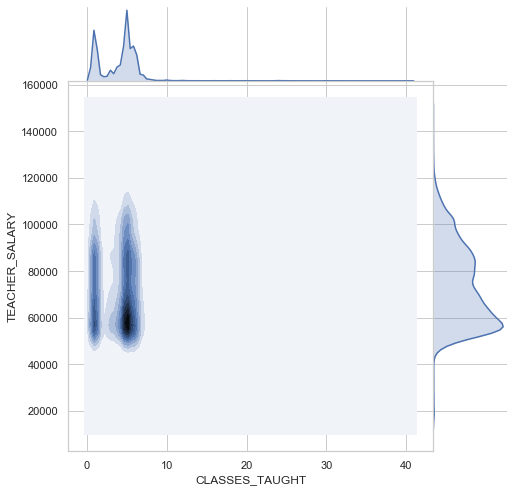

In [153]:
# Shows how years_taught is related to techer_salary
g = sns.jointplot(df['CLASSES_TAUGHT'], df['TEACHER_SALARY'], kind="kde", height=7, space=0)

In [94]:
df.head()

,TEACHER_SALARY,YEARS_TAUGHT,LASTNAME,FULL_TIME,CLASSES_TAUGHT,JOBCODE1,HIGHESTCOMPLETED,COUNTY_CODE,COUNTY
0,55996.0,NaN,Gibbons,1,1.0,1001,NaN,1,Atlantic
1,86539.0,19.0,Adair,1,5.0,1001,Masters,1,Atlantic
2,64357.0,9.0,Roberts,1,5.0,1001,Bachelors,1,Atlantic
3,90308.0,19.0,Horner,1,5.0,1001,Doctoral,1,Atlantic
4,67401.0,12.0,Broomhead,1,5.0,1106,Bachelors,1,Atlantic


In [105]:
df['TEACHER_SALARY'].isnull().sum()
print(df['TEACHER_SALARY'][15258])

nan


In [95]:
# Stores salary respective to countyName
salaryCounty = dict()
len(df)

41300

In [109]:
# Stores county_name as key, and list of salries as value
salaryCounty = dict()
for i in range(len(df)):
    if  pd.isna(df['TEACHER_SALARY'][i]):
        print("NAN FOUND")
        continue
    if df['COUNTY'][i] in salaryCounty:
        salaryCounty[df['COUNTY'][i]].append(df['TEACHER_SALARY'][i])
    else:
        salaryCounty[df['COUNTY'][i]] = [df['TEACHER_SALARY'][i]]
#     print(df['TEACHER_SALARY'][i], df['COUNTY_CODE'][i])

NAN FOUND
NAN FOUND
NAN FOUND
NAN FOUND


In [111]:
# change the value(list of salaries) to average salary

for key, value in salaryCounty.items():
    salaryCounty[key] = sum(value) / len(value)

In [112]:
print(salaryCounty)

{'Atlantic': 72677.09027373325, 'Bergen': 77958.74184397163, 'Burlington': 73142.60783487784, 'Camden': 70417.06629578117, 'Cape May': 73035.17710583154, 'Cumberland': 67919.32384341636, 'Essex': 76549.3027027027, 'Gloucester': 67830.98056801196, 'Hudson': 77518.78422190202, 'Hunterdon': 68856.4289897511, 'Mercer': 73952.41064198958, 'Middlesex': 73750.37207093097, 'Monmouth': 72504.99337947638, 'Morris': 72415.95485969906, 'Ocean': 66243.52531945102, 'Passaic': 74183.19149908592, 'Salem': 63487.943396226416, 'Somerset': 72656.63450292397, 'Sussex': 75557.29733520337, 'Union': 74690.63351955307, 'Warren': 70066.5}


In [113]:
# Get the list of counties and their avgSalries
county = list(salaryCounty.keys())
avgSalary = list(salaryCounty.values())

In [117]:
print("{0:<20}{1:<20}".format("County", "Average Salary"))
for i in range(len(county)):
    print("{0:<20}{1:<20}".format(county[i], str(avgSalary[i])))

County              Average Salary      
Atlantic            72677.09027373325   
Bergen              77958.74184397163   
Burlington          73142.60783487784   
Camden              70417.06629578117   
Cape May            73035.17710583154   
Cumberland          67919.32384341636   
Essex               76549.3027027027    
Gloucester          67830.98056801196   
Hudson              77518.78422190202   
Hunterdon           68856.4289897511    
Mercer              73952.41064198958   
Middlesex           73750.37207093097   
Monmouth            72504.99337947638   
Morris              72415.95485969906   
Ocean               66243.52531945102   
Passaic             74183.19149908592   
Salem               63487.943396226416  
Somerset            72656.63450292397   
Sussex              75557.29733520337   
Union               74690.63351955307   
Warren              70066.5             


In [131]:
import plotly.express as px
import plotly.graph_objects as go


In [134]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=county, y = avgSalary, line=dict(color='firebrick', width=4)))
# Edit the layout
fig.update_layout(title='Average Teacher Salary in New Jersey County',
                   xaxis_title='County Name',
                   yaxis_title='Average Salary')
fig.show()

In [150]:
import plotly.express as px
tips = px.data.tips()
print(tips)

     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]


c:\users\abastola\appdata\local\programs\python\python37-32\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning:

invalid value encountered in greater_equal

c:\users\abastola\appdata\local\programs\python\python37-32\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning:

invalid value encountered in less_equal



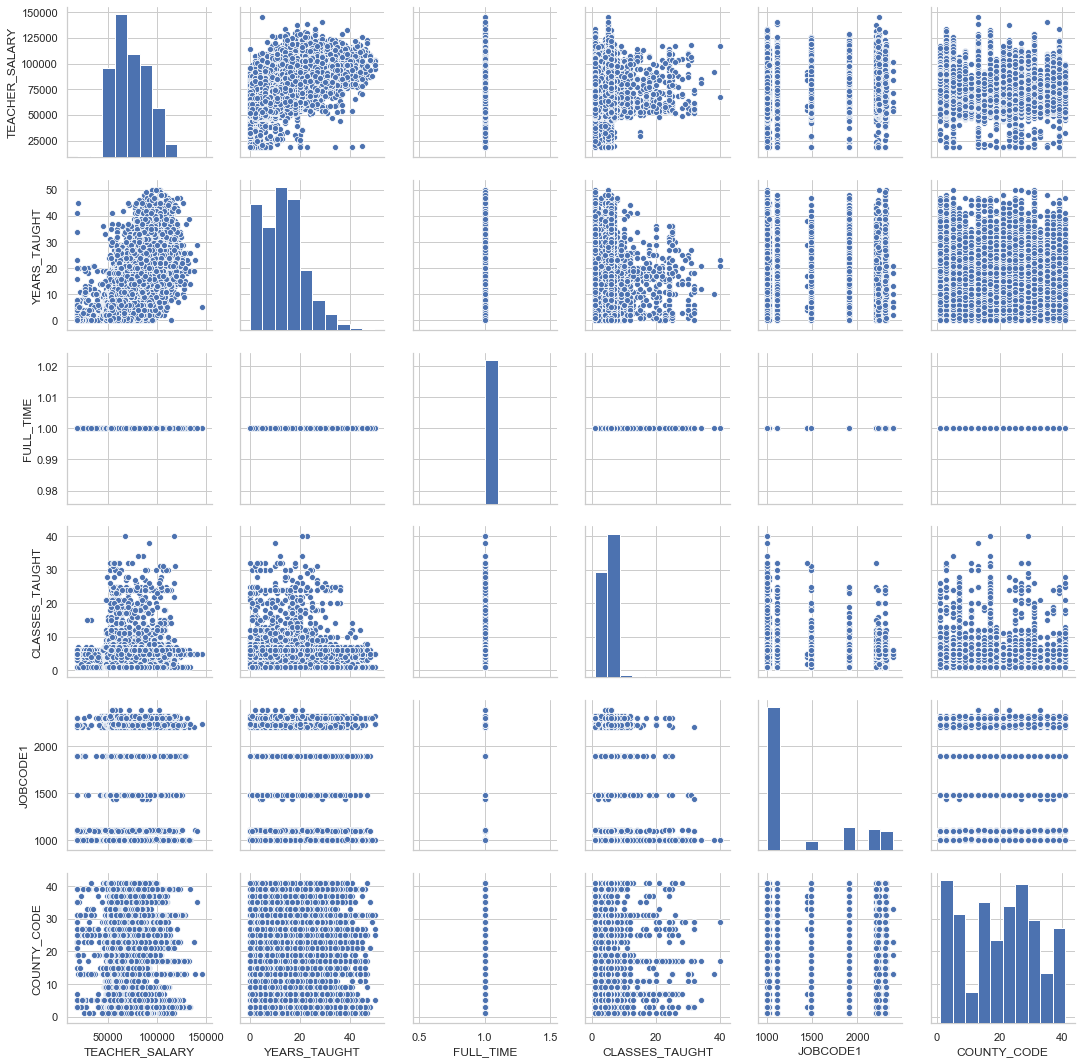

In [152]:
g = sns.pairplot(df)

# Several Years
### SeveralYearsData.xls
#### 2004, 2006, 2009, 2011, 2014, 2017